# (Flights Datasets Exploration)
## by (Raied Aljolayfi)

## Preliminary Wrangling

> These datasets reports ﬂights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.
> I will start with **2008** dataset which has **7,009,728** records

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#df_1987 = pd.read_csv('1987.csv')
#df_2007 = pd.read_csv('2007.csv')
df_2008 = pd.read_csv('2008.csv')

### What is the structure of your dataset?
<br></br>
There are **7,009,728** flights details in the **2008** dataset with **29** features. Lots of variables are numeric in nature because of the importance of **Time** & **Delay**, such as (**`DepTime`**, **`ArrTime`**, **`ActualElapsedTime`**, **`ArrDelay`**, **`DepDelay`** .. and more), but the variables **`UniqueCarrier`**, **`Origin`**, and **`Dest`** are nominal variables. 
<br></br>
<br></br>
Here are the description of each column:
<br></br>
<br></br>
**Year:** 1987-2008
<br></br>
**Month:** 1-12
<br></br>
**DayofMonth:** 1-31
<br></br>
**DayOfWeek:** 1 (Monday) - 7 (Sunday)
<br></br>
**DepTime:** actual departure time (local, hhmm)
<br></br>
**CRSDepTime:** scheduled departure time (local, hhmm)
<br></br>
**ArrTime:** actual arrival time (local, hhmm)
<br></br>
**CRSArrTime:** scheduled arrival time (local, hhmm)
<br></br>
**UniqueCarrier:** Listing of carrier codes with full names: carriers.csv
<br></br>
**FlightNum:** flight number
<br></br>
**TailNum:** plane tail number
<br></br>
**ActualElapsedTime:** in minutes
<br></br>
**CRSElapsedTime:** in minutes
<br></br>
**AirTime:** in minutes
<br></br>
**ArrDelay:** arrival delay, in minutes
<br></br>
**DepDelay:** departure delay, in minutes
<br></br>
**Origin:** origin IATA airport code
<br></br>
**Dest:** destination IATA airport code
<br></br>
**Distance:** in miles
<br></br>
**TaxiIn:** taxi in time, in minutes
<br></br>
**TaxiOut:** taxi out time in minutes
<br></br>
**Cancelled:** was the flight cancelled?
<br></br>
**CancellationCode:** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
<br></br>
**Diverted:** 1 = yes, 0 = no
<br></br>
**CarrierDelay:** in minutes
<br></br>
**WeatherDelay:** in minutes
<br></br>
**NASDelay:** in minutes
<br></br>
**SecurityDelay:** in minutes
<br></br>
**LateAircraftDelay:** in minutes
<br></br>

### What is/are the main feature(s) of interest in your dataset?

> UniqueCarrier, 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> **`Carrier.Code`** & **`Airport.iata`**

In [3]:
carrier = pd.read_csv('carriers.csv')

In [4]:
airport = pd.read_csv('Airports.csv')

In [5]:
#print(df_1987.shape)
#print(df_2007.shape)
print(df_2008.shape)
print(carrier.shape)
print(airport.shape)

(1311826, 29)
(7453215, 29)
(7009728, 29)
(1491, 2)
(3376, 7)


In [6]:
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [7]:
carrier.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [8]:
df_2008.DepTime.value_counts()

555.0     17227
600.0     16436
700.0     15169
655.0     15123
557.0     14686
556.0     14563
558.0     14071
559.0     12566
658.0     11849
657.0     11849
656.0     11834
755.0     11419
825.0     11305
659.0     11222
630.0     11190
900.0     11183
855.0     11066
1700.0    11006
1655.0    10736
625.0     10728
1500.0    10581
1100.0    10572
1120.0    10470
1000.0    10428
554.0     10425
830.0     10400
1125.0    10368
1325.0    10245
800.0     10125
1330.0    10099
          ...  
414.0         8
242.0         8
418.0         8
352.0         8
413.0         8
416.0         7
348.0         7
425.0         7
349.0         7
422.0         7
357.0         7
308.0         7
343.0         7
253.0         7
254.0         7
337.0         7
353.0         6
421.0         6
312.0         6
341.0         6
336.0         5
420.0         5
429.0         5
302.0         5
338.0         4
344.0         4
342.0         4
346.0         3
347.0         3
417.0         3
Name: DepTime, Length: 1

In [9]:
airport.query('iata == "SAN"')

,iata,airport,city,state,country,lat,long
2881,SAN,San Diego International-Lindbergh,San Diego,CA,USA,32.733556,-117.189657


In [10]:
carrier.query('Code == "PS"')

,Code,Description
1027,PS,Pacific Southwest Airlines


In [67]:
# Show all carriers name
for x in range(1491):
    print(x,' ',carrier.Description[x])

0   Titan Airways
1   Tradewind Aviation
2   Comlux Aviation, AG
3   Master Top Linhas Aereas Ltd.
4   Flair Airlines Ltd.
5   Swift Air, LLC
6   DCA
7   ACM AIR CHARTER GmbH
8   Maine Aviation Aircraft Charter, LLC
9   Inter Island Airways, d/b/a Inter Island Air
10   Polar Airlines de Mexico d/b/a Nova Air
11   JetClub AG
12   Vision Airlines
13   Mokulele Flight Services, Inc.
14   Metropix UK, LLP.
15   Multi-Aero, Inc. d/b/a Air Choice One
16   Flying Service N.V.
17   PSA Airlines Inc.
18   Piedmont Airlines
19   Sky Trek Int'l Airlines
20   Smokey Bay Air Inc.
21   Frontier Flying Service
22   Midway Express Airlines
23   Island Air Service
24   Regal Air
25   Canada 3000 Airlines Ltd.
26   Valley Air Express Inc.
27   Zeal 320
28   Regions Air, Inc.
29   Pacific Airways, Inc.
30   Gulfstream Int
31   Tatonduk Flying Service
32   Olson Air Service
33   Tanana Air Service
34   British Airtours Limited
35   Belize Trans Air
36   LAN Argentina
37   Lan Dominica
38   Air North
39   

530   Primaris Airlines Inc.
531   Tower Air Inc.
532   Five Star Airlines
533   Frontier Horizon Inc.
534   Icelandair
535   Air Pacific Ltd.
536   Air Pacific Ltd. (1)
537   AirTran Airways Corporation
538   Frontier Airlines Inc. (1)
539   Florida Air
540   Flamenco Airways Inc.
541   Flirite Inc.
542   Fine Airlines Inc.
543   Ford-Aire Inc.
544   Foster Aviation
545   Air Aruba
546   Freedom Air
547   Four Star Aviation
548   Frontier Commuter
549   Farwest Airlines
550   Serv De Trans Aereos Fuegui
551   F.S. Air Service
552   Flying Tiger Line Inc.
553   Southern Airways
554   Skycraft Inc.
555   Skybus Inc.
556   Far West Airlines
557   Federal Express Corporation
558   Flying Boat
559   Aerochago S.A.
560   Allegiant Air
561   GoJet Airlines, LLC d/b/a United Express
562   P.T. Garuda Indonesian Arwy
563   Galena Air Service
564   Galaxy Airlines Inc.
565   General Aviation Inc.
566   Gulf Air Taxi
567   Gromer Aviation Inc.
568   Central States Airline
569   G5 Executive Ag
5

1030   Flight International
1031   Primeras Lineas Uruguays For International
1032   Aeropuma
1033   Eastern Provincial Airways
1034   Precision Valley Aviation
1035   Pacific Western Airlines
1036   Surinam Airways Limited
1037   Lineas Aereas Paraguayas
1038   Zambia Airways Corp.
1039   Master Top Linhas Aereas, Ltda.
1040   40-Mile Air
1041   Sobelair
1042   Inter-Quebec (Intair)
1043   Grand Airways Inc.
1044   Qantas Airways Ltd.
1045   Sky West Aviation Inc.
1046   Air Florida Inc.
1047   Air Canada Regional
1048   Royal Air
1049   Aeromexpress
1050   Bar Harbor Airways
1051   Reno Air Inc.
1052   Qatar Airways (Q.C.S.C)
1053   Northeastern Int'l Airways
1054   Transportes Aereos Mercantiles Panamericanos S.A
1055   Aer Turas Teoranta
1056   Qwest Commuter
1057   Horizon Air
1058   Royal-Air Ltd.
1059   Pan Am Express
1060   Arista Int'l Airlines Inc.
1061   Royale Airlines Inc.
1062   Syrian Arab Airlines
1063   Republic Airlines Inc.
1064   Mid-South Aviation Inc. (1)
1065   R

In [11]:
df_2008['Origin'].head()

0    IAD
1    IAD
2    IND
3    IND
4    IND
Name: Origin, dtype: object

In [12]:
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [58]:
#df_2008.describe(include = ['ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut',
#                            'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])
df_2008.describe(include = float)

,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,6.873482e+06,6.858079e+06,6.855029e+06,7.008884e+06,6.855029e+06,6.855029e+06,6.873482e+06,6.858079e+06,6.872670e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,1.333830e+03,1.481258e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168452e+00,9.972570e+00,6.860852e+00,1.645305e+01,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,4.780689e+02,5.052251e+02,7.018731e+01,6.940974e+01,6.743980e+01,3.850194e+01,3.531127e+01,4.933649e+00,1.133280e+01,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,1.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.280000e+02,1.107000e+03,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.325000e+03,1.512000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,1.728000e+03,1.909000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,8.000000e+00,1.900000e+01,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2.400000e+03,2.400000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,3.080000e+02,4.290000e+02,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [14]:
list(df_2008)

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [15]:
carrier_order = df_2008.UniqueCarrier.value_counts().index

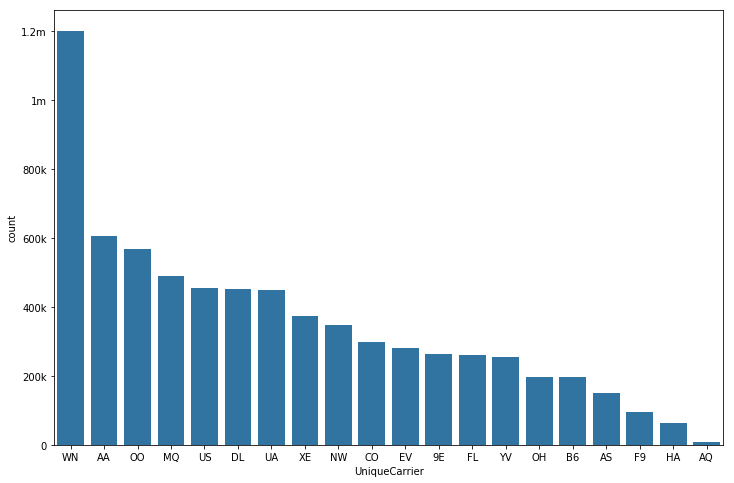

In [16]:
# First, let's plot the carriers frequency

plt.figure(figsize = (12, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008, x = 'UniqueCarrier', color = color_palette, order = carrier_order );
plt.yticks([0, 2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['0' ,'200k' ,'400k' ,'600k' ,'800k' ,'1m', '1.2m']);

In [17]:
df_2008.groupby(['Year', 'Month','DayofMonth','DayOfWeek']).Year.count()

Year  Month  DayofMonth  DayOfWeek
2008  1      1           2            19187
             2           3            20954
             3           4            20937
             4           5            20929
             5           6            18069
             6           7            19897
             7           1            20347
             8           2            19604
             9           3            19820
             10          4            20305
             11          5            20349
             12          6            16572
             13          7            18947
             14          1            20178
             15          2            19504
             16          3            19768
             17          4            20277
             18          5            20348
             19          6            16255
             20          7            18653
             21          1            20133
             22          2            195

In [18]:
# To get and show carriers name in plots, let's merge the tables

df_2008_clean = pd.merge(df_2008, carrier, left_on='UniqueCarrier', right_on='Code')

In [19]:
df_2008_clean.shape

(7009728, 31)

In [20]:
# To get and show airports name in plots, let's merge the tables

df_2008_clean = pd.merge(df_2008_clean, airport, left_on='Origin', right_on='iata')

In [21]:
df_2008_clean.shape

(7009728, 38)

In [22]:
df_2008_clean.head(15)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,LateAircraftDelay,Code,Description,iata,airport,city,state,country,lat,long
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
2,2008,1,4,5,813.0,815,1035.0,1040,WN,2622,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
3,2008,1,4,5,1451.0,1450,1653.0,1710,WN,1491,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
4,2008,1,4,5,940.0,940,1140.0,1200,WN,3760,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
5,2008,1,4,5,1043.0,1045,1133.0,1145,WN,470,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
6,2008,1,4,5,630.0,630,714.0,725,WN,511,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
7,2008,1,4,5,2110.0,2100,2156.0,2200,WN,999,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
8,2008,1,4,5,1858.0,1720,1945.0,1820,WN,1394,...,76.0,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
9,2008,1,4,5,1505.0,1505,1550.0,1605,WN,1662,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581


In [23]:
list(df_2008_clean)

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'Code',
 'Description',
 'iata',
 'airport',
 'city',
 'state',
 'country',
 'lat',
 'long']

In [24]:
# Let's rename the columns for origin, because we have to do another merge based on Dest column

df_2008_clean.rename(columns = {'Code':'carrier_code', 'Description':'carrier_desc', 'iata':'origin_iata', 
                                'airport':'origin_airport', 'city':'origin_city', 'state':'origin_state', 
                                'country':'origin_country', 'lat':'origin_lat', 'long':'origin_long'}, inplace = True)

In [25]:
# This merge like the prvious one but it is for Dest column to show the destination airports name

df_2008_clean = pd.merge(df_2008_clean, airport, left_on='Dest', right_on='iata')

In [26]:
list(df_2008_clean)

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'carrier_code',
 'carrier_desc',
 'origin_iata',
 'origin_airport',
 'origin_city',
 'origin_state',
 'origin_country',
 'origin_lat',
 'origin_long',
 'iata',
 'airport',
 'city',
 'state',
 'country',
 'lat',
 'long']

In [27]:
# Let's rename the columns for Dest like what we did for Origin

df_2008_clean.rename(columns = {'iata':'dest_iata', 
                                'airport':'dest_airport', 'city':'dest_city', 'state':'dest_state', 
                                'country':'dest_country', 'lat':'dest_lat', 'long':'dest_long'}, inplace = True)

In [28]:
list(df_2008_clean)

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'carrier_code',
 'carrier_desc',
 'origin_iata',
 'origin_airport',
 'origin_city',
 'origin_state',
 'origin_country',
 'origin_lat',
 'origin_long',
 'dest_iata',
 'dest_airport',
 'dest_city',
 'dest_state',
 'dest_country',
 'dest_lat',
 'dest_long']

In [29]:
# Order the values for our plot

carrier_order = df_2008_clean.carrier_desc.value_counts().index

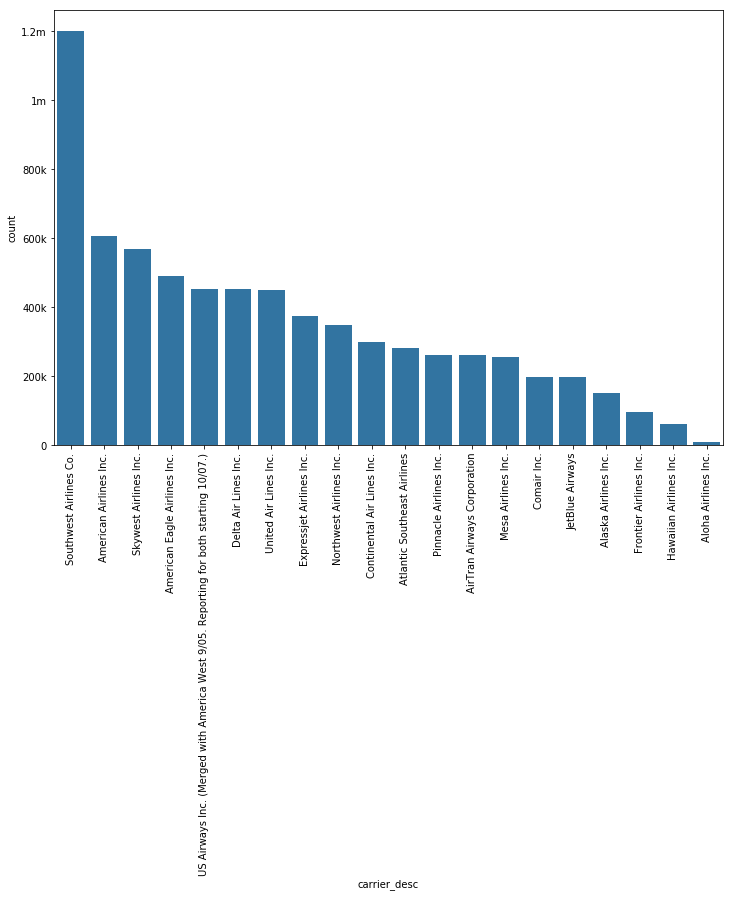

In [30]:
plt.figure(figsize = (12, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'carrier_desc', color = color_palette, order = carrier_order );
plt.yticks([0, 2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['0' ,'200k' ,'400k' ,'600k' ,'800k' ,'1m', '1.2m']);
plt.xticks(rotation = 90);

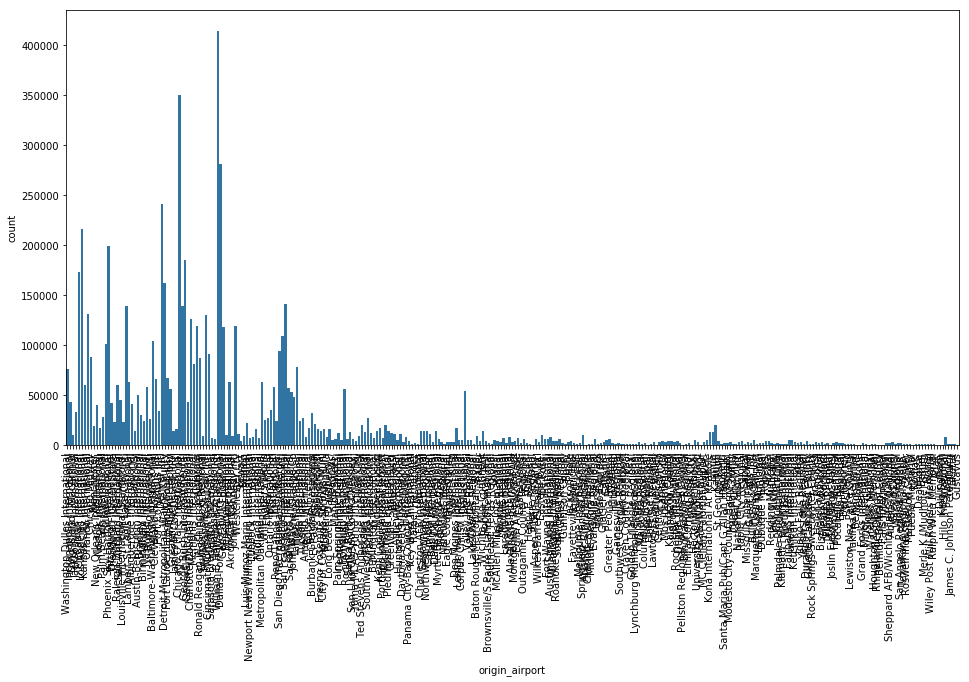

In [32]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette);
#plt.yticks([0, 2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['0' ,'200k' ,'400k' ,'600k' ,'800k' ,'1m', '1.2m']);
plt.xticks(rotation = 90);

In [33]:
origin_order = df_2008_clean.origin_airport.value_counts().index

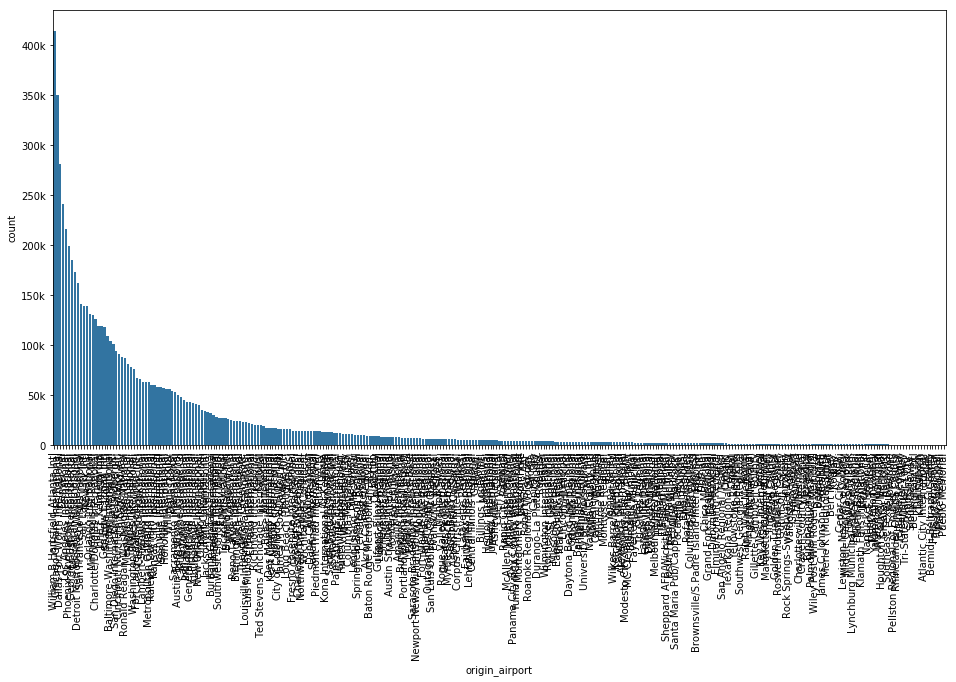

In [34]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette, order = origin_order);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

In [35]:
origin_order2 = df_2008_clean.origin_airport.value_counts().iloc[:30].index

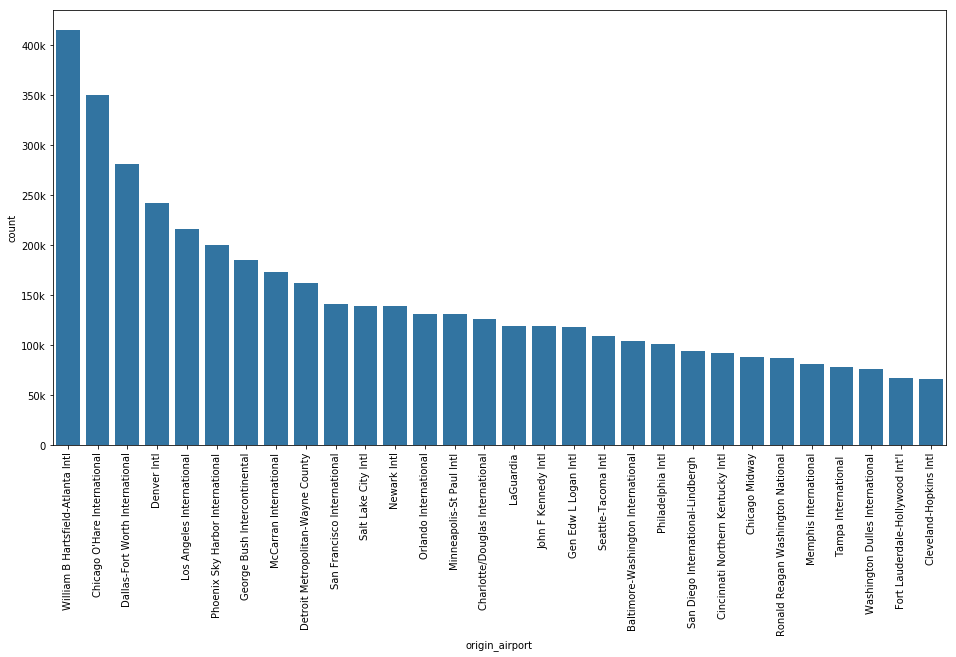

In [36]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette, order = origin_order2);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

In [37]:
dest_order = df_2008_clean.dest_airport.value_counts().index

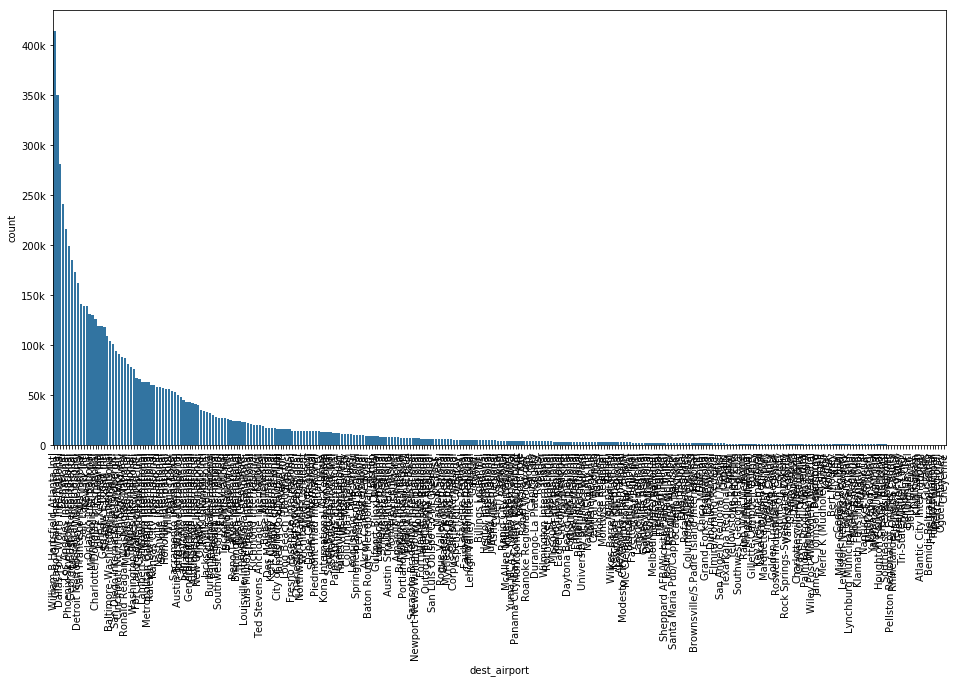

In [38]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'dest_airport', color = color_palette, order = dest_order);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

In [39]:
dest_order2 = df_2008_clean.dest_airport.value_counts().iloc[:30].index

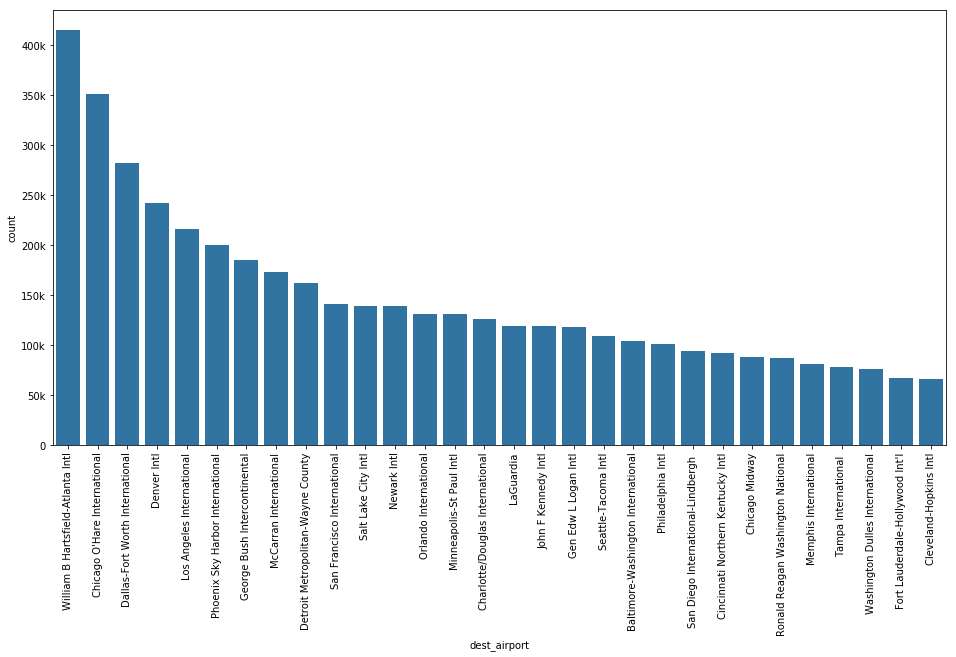

In [40]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'dest_airport', color = color_palette, order = dest_order2);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

In [41]:
df_2008_clean.dest_airport.value_counts().iloc[:30]

William B Hartsfield-Atlanta Intl     414521
Chicago O'Hare International          350452
Dallas-Fort Worth International       281401
Denver Intl                           241470
Los Angeles International             215685
Phoenix Sky Harbor International      199416
George Bush Intercontinental          185160
McCarran International                172871
Detroit Metropolitan-Wayne County     162000
San Francisco International           140579
Salt Lake City Intl                   139077
Newark Intl                           138491
Orlando International                 130859
Minneapolis-St Paul Intl              130320
Charlotte/Douglas International       126030
LaGuardia                             119117
John F Kennedy Intl                   118802
Gen Edw L Logan Intl                  117944
Seattle-Tacoma Intl                   109075
Baltimore-Washington International    104068
Philadelphia Intl                     100483
San Diego International-Lindbergh      93750
Cincinnati

In [42]:
df_2008_clean.origin_airport.value_counts().iloc[:30]

William B Hartsfield-Atlanta Intl     414513
Chicago O'Hare International          350380
Dallas-Fort Worth International       281281
Denver Intl                           241443
Los Angeles International             215608
Phoenix Sky Harbor International      199408
George Bush Intercontinental          185172
McCarran International                172876
Detroit Metropolitan-Wayne County     161989
San Francisco International           140587
Salt Lake City Intl                   139088
Newark Intl                           138506
Orlando International                 130872
Minneapolis-St Paul Intl              130289
Charlotte/Douglas International       126045
LaGuardia                             119135
John F Kennedy Intl                   118804
Gen Edw L Logan Intl                  117915
Seattle-Tacoma Intl                   109069
Baltimore-Washington International    104074
Philadelphia Intl                     100499
San Diego International-Lindbergh      93775
Cincinnati

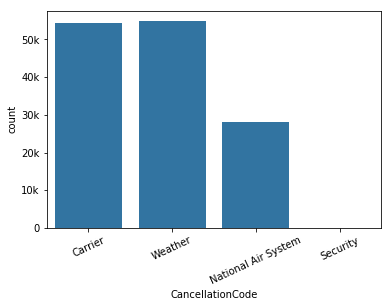

In [60]:
color_palette = sb.color_palette()[0]
labels = ['Carrier', 'Weather', 'National Air System', 'Security']
fig, ax1 = plt.subplots(1,1);
#plt.figure(figsize = (16, 8));
sb.countplot(data = df_2008_clean, x = 'CancellationCode', color = color_palette, ax=ax1);
ax1.set_xticklabels(labels, rotation=25);
plt.yticks([0, 1e4, 2e4, 3e4, 4e4, 5e4],['0', '10k', '20k', '30k', '40k', '50k']);
#plt.xticks(['B', 'A', 'C', 'D'], ['Weather', 'Carrier', 'National Air System', 'Security'])
#plt.xticks(['A','B','C','D'],['Carrier', 'Weather', 'National Air System', 'Security'])

##### Because of the `DepTime` values stored as float, we should find a way to convert it to format like HH:MM

In [44]:
import re
s = "2003.0"
#s = "754.0"
print(re.findall(r"\d\d\.", s))

['03.']


In [45]:
r = 2003.0
s = 754.0
t = 0030.0
u = 0003.0
d = 00.00
print(r/100,int(r/100))
print(s/100,int(s/100))
print(t/100,int(t/100))
print(u/100,int(u/100))
print(d/100,int(d/100))

20.03 20
7.54 7
0.3 0
0.03 0
0.0 0


In [46]:
df_2008_clean['DepTimeHM'] = df_2008_clean['DepTime']/100

In [47]:
df_2008_clean['DepTimeHM'] = df_2008_clean['DepTimeHM'].fillna(0).astype(int)

In [48]:
df_2008_clean['DepTimeHM'].astype(int)

0          20
1           7
2          20
3           7
4          20
5           7
6          19
7           7
8          19
9           7
10         19
11          7
12         19
13          7
14         19
15          7
16         19
17          7
18         19
19          7
20          7
21         20
22          7
23         19
24          7
25         19
26          7
27         19
28          7
29         20
           ..
7009698    15
7009699    15
7009700    16
7009701    15
7009702    15
7009703     0
7009704     0
7009705    15
7009706    15
7009707    15
7009708    16
7009709    15
7009710    16
7009711    16
7009712    15
7009713    15
7009714    15
7009715    15
7009716    15
7009717    17
7009718    15
7009719    15
7009720    15
7009721     0
7009722    15
7009723     0
7009724    19
7009725     0
7009726    15
7009727    15
Name: DepTimeHM, Length: 7009728, dtype: int32

In [49]:
df_2008_clean.head(15)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,origin_lat,origin_long,dest_iata,dest_airport,dest_city,dest_state,dest_country,dest_lat,dest_long,DepTimeHM
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,20
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7
2,2008,1,4,5,2002.0,1955,2208.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,20
3,2008,1,4,5,734.0,735,938.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7
4,2008,1,5,6,2000.0,1955,2214.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,20
5,2008,1,5,6,731.0,735,938.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7
6,2008,1,6,7,1959.0,1955,2211.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,19
7,2008,1,6,7,734.0,735,935.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7
8,2008,1,7,1,1951.0,1955,2159.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,19
9,2008,1,7,1,737.0,735,1000.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7


C:\Users\raied\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\raied\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


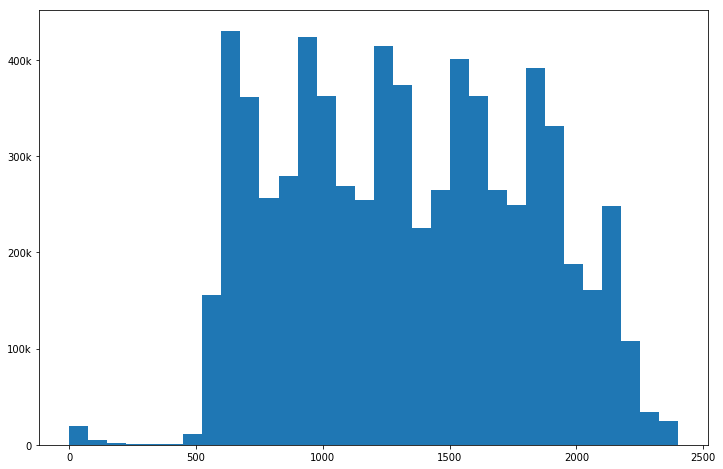

In [50]:
plt.figure(figsize = (12, 8));
plt.hist(data = df_2008_clean, x = 'DepTime', bins = 32);
plt.yticks([0, 10e4, 20e4, 30e4, 40e4],['0', '100k', '200k', '300k', '400k']);

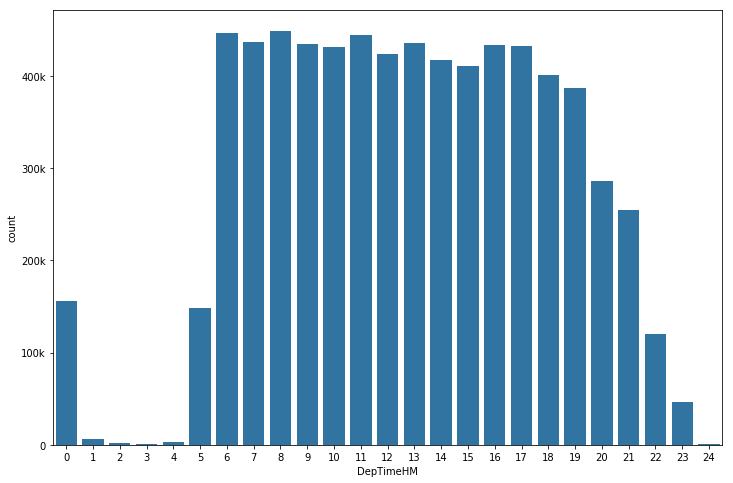

In [51]:
plt.figure(figsize = (12, 8))
color_palatte = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'DepTimeHM', color = color_palette);
plt.yticks([0, 10e4, 20e4, 30e4, 40e4],['0', '100k', '200k', '300k', '400k']);

In [52]:
df_2008_clean.query('DepTimeHM == 24')
df_2008_clean.query('DepTimeHM == 23')['DepTime']

304        2302.0
703        2324.0
888        2312.0
893        2354.0
905        2357.0
1238       2338.0
2761       2352.0
6028       2352.0
6040       2348.0
6042       2353.0
6044       2342.0
6047       2352.0
6051       2350.0
6053       2352.0
6055       2350.0
6058       2348.0
6062       2346.0
6066       2358.0
6073       2348.0
6075       2352.0
6077       2352.0
6085       2349.0
6087       2352.0
6090       2355.0
6095       2358.0
6097       2354.0
6101       2348.0
6103       2357.0
6105       2345.0
6107       2347.0
            ...  
6974183    2342.0
6974652    2313.0
6975528    2315.0
6975610    2300.0
6976315    2342.0
6976432    2317.0
6976497    2320.0
6976732    2337.0
6977319    2343.0
6977728    2334.0
6977757    2311.0
6977910    2319.0
6977955    2320.0
6980894    2315.0
6982151    2307.0
6982783    2350.0
6982791    2314.0
6983234    2302.0
6983452    2341.0
6984253    2341.0
6990068    2325.0
6990189    2318.0
6990614    2322.0
6995797    2305.0
7004345   

In [53]:
df_2008_clean.groupby(['Cancelled', 'CancellationCode', 'carrier_desc']).Year.count()

Cancelled  CancellationCode  carrier_desc                                                                       
1          A                 AirTran Airways Corporation                                                             815
                             Alaska Airlines Inc.                                                                   1222
                             Aloha Airlines Inc.                                                                      42
                             American Airlines Inc.                                                                 9609
                             American Eagle Airlines Inc.                                                           3644
                             Atlantic Southeast Airlines                                                            1384
                             Comair Inc.                                                                            1328
                             Continental